In [1]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Get Chandra 2016 Catalog Data

In [3]:
# open COSMOS 2016 catalog file and get data 
inf16 = fits.open('D:\IfA REU\Catalogs\chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits')
data16 = inf16[1].data
cols16 = inf16[1].columns
inf16.close()

In [4]:
# print(cols16)

In [5]:
# get data arrays from columns
L0510_data = np.array(data16['Lx_0510'])        # x-ray luminosity in the 0.5-10 KeV band
k0510_data = np.array(data16['abs_corr_0510'])  # absorbtion correction coefficient in the 0.5-10 KeV band
z_data     = np.array(data16['z_best'])         # best redshift 
id_data    = np.array(data16['id_k_uv'])        # id 

In [6]:
##### print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('Lx 0510 \t',     min(L0510_data),    '\t\t',   max(L0510_data),  '\t',   len(L0510_data))
print('k 0510 \t\t',    min(k0510_data),    '\t\t',   max(k0510_data),  '\t\t', len(k0510_data))
print('z  \t\t',        min(z_data),        '\t\t',   max(z_data),      '\t\t', len(z_data))
print('ID  \t\t',       min(id_data),       '\t\t',   max(id_data),     '\t',   len(id_data))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
Lx 0510 	 -99.0 		 45.703 	 4016
k 0510 		 -99.0 		 1.0 		 4016
z  		 -99.0 		 6.84 		 4016
ID  		 -99 		 1146373 	 4016


In [7]:
# determine valid list index
good = (L0510_data > 0) & (k0510_data > 0) & (z_data > 0) & (id_data > 0)

# filter data
L0510_data_good = L0510_data[good]
k0510_data_good = k0510_data[good]
z_data_good     = z_data[good]
id_data_good    = id_data[good]

In [8]:
# print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('Lx 0510 \t',     min(L0510_data_good),    '\t',     max(L0510_data_good),  '\t',   len(L0510_data_good))
print('k 0510 \t\t',    min(k0510_data_good),    '\t\t',   max(k0510_data_good),  '\t\t', len(k0510_data_good))
print('z  \t\t',        min(z_data_good),        '\t\t',   max(z_data_good),      '\t\t', len(z_data_good))
print('ID  \t\t',       min(id_data_good),       '\t\t',   max(id_data_good),     '\t',   len(id_data_good))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
Lx 0510 	 39.594 	 45.545 	 2648
k 0510 		 0.421 		 1.0 		 2648
z  		 0.029 		 5.872 		 2648
ID  		 8969 		 1146373 	 2648


# Plot Redshift VS Luminosity

In [9]:
# redefine the defaults for plots 
myP.SetStyle()

In [10]:
# correct for absorbtion: k_abs = L_abs / L_int --> L_int = L_abs / k_abs
# Note: L0510_data_good is a log. First, un-log L0510_data_good, then divide by k_abs. Then convert back to log. 

# k_abs = L_abs / L_int 
# L_int = L_abs / k_abs
# L_int = 10**(l_abs) / k_abs
# log(L_int) = Log(10**(l_abs) / k_abs)
# log(L_int) = Log(10**(l_abs)) - log(k_abs)
# log(L_int) = l_abs - log(k_abs)

Lint = L0510_data_good - np.log10(k0510_data_good)

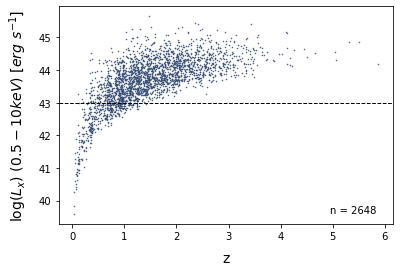

In [18]:
# plot luminosity vs redshift for all sources
plt.plot(z_data_good, Lint, 'o', c=myP.c_xray, markersize=0.5)
plt.axhline(y=43, color='k', linestyle='dashed')

# plt.title('Redshift VS. X-ray luminosity from all Chandra 2016 sources')
plt.xlabel('z')
plt.ylabel('$\log(L_x) \,\, (0.5-10keV) \,\, [erg \,\, s^{-1}]$')
myP.addtext_n(len(z_data_good))
myP.save(path_fig+'\Chandra2016_ZvsL_all.png')
plt.show()

In [12]:
# cut Lint to select AGN
agn_cut  = Lint >= 43

# filter lists
Lint_agn = Lint[agn_cut]
z_agn    = z_data_good[agn_cut]
id_agn   = id_data_good[agn_cut]

In [13]:
##### export ids of AGN to csv

# open file 
with open(path_csv+'\ID_Chandra2016_Xray_AGN.csv', mode='w', newline='') as csv_file:
    # initialize csv
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    # write header
    writer.writerow(['This file contains the IDs of X-ray selected AGN from the Chanra 2016 catalog: Col=id_k_uv.'])
    # write agn id list to file 
    writer.writerow(id_agn)
    

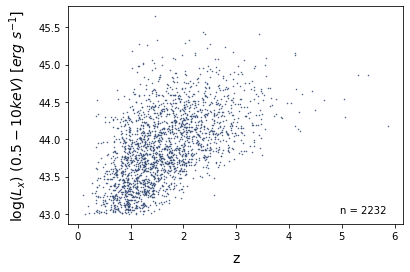

Number:  2232


In [14]:
# plot luminosity vs redshift for agn
plt.plot(z_agn, Lint_agn, 'o', c=myP.c_xray, markersize=0.5)
# plt.title('Redshift VS. X-ray luminosity from Chandra 2016 AGN')
plt.xlabel('z')
plt.ylabel('$\log(L_x) \,\, (0.5-10keV) \,\, [erg \,\, s^{-1}]$')
myP.addtext_n(len(z_agn))
myP.save(path_fig+'\Chandra2016_ZvsL_agn.png')
plt.show()

print('Number: ', len(Lint_agn))

# Properties

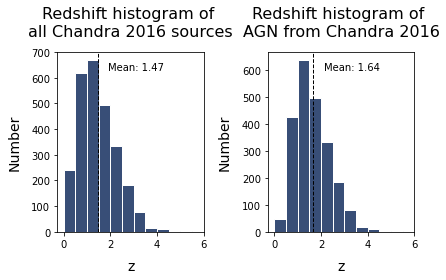

In [15]:
##### Plot the histograms of the redshifts of the Donley selected AGN 

# subplots 
fig, (z_hist, z_hist_agn) = plt.subplots(1,2)

## z_hist subplot

# plot all redshift histogram
z_hist.hist(z_data_good, bins=np.arange(0,6,0.5), edgecolor='w', color=myP.c_xray)

# axis and titles 
z_hist.set_title('Redshift histogram of \nall Chandra 2016 sources')
z_hist.set_xlabel('z')
z_hist.set_ylabel('Number')
z_hist.set_xticks([0,2,4,6])

# mean 
mean_all = z_data_good.mean()
min_ylim_all, max_ylim_all = z_hist.get_ylim()
z_hist.axvline(mean_all, color='k',linestyle='dashed')
z_hist.text(mean_all*1.3, max_ylim_all*0.9, 'Mean: {:.2f}'.format(mean_all))

## z_hist_agn subplot

# plot agn redshift histogram
z_hist_agn.hist(z_agn, bins=np.arange(0,6,0.5), edgecolor='w', color=myP.c_xray)

# axis and titles 
z_hist_agn.set_title('Redshift histogram of \nAGN from Chandra 2016')
z_hist_agn.set_xlabel('z')
z_hist_agn.set_ylabel('Number')
z_hist_agn.set_xticks([0,2,4,6])

# mean 
mean_agn = z_agn.mean()
min_ylim_agn, max_ylim_agn = z_hist_agn.get_ylim()
z_hist_agn.axvline(mean_agn, color='k',linestyle='dashed')
z_hist_agn.text(mean_agn*1.3, max_ylim_agn*0.9, 'Mean: {:.2f}'.format(mean_agn))

## end subplots 

# formatting and save  
plt.tight_layout()
myP.save(path_fig+'\Chandra2016_Redshift_Histogram.png')
